## Most Common Methods for Cleaning the Data
##### Removing HTML tags
##### Removing & Finding URL
##### Removing & Finding Email id
##### Removing Stop Words
##### Standardizing and Spell Check
##### Chat word correction
##### Remove the frequent words
##### Removing the less frequent words
Removing HTML characters,ASCII
Convert Text to Lowercase
Remove Punctuation's
Remove Stop words
Tokenization
Lemmatization

In [220]:
!pip install wordcloud

In [221]:
import os
import pandas as pd 
import numpy as np 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline


#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries

 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [222]:
import string
pucn = string.punctuation
stop = stopwords.words('english')

In [223]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    url_free = url.sub(r'', text)
    return url_free


In [224]:
def remove_numbers(text):
    alpha = ''.join([word for word in text if not word.isdigit()])
    return alpha

In [225]:
def remove_nonwords(text):
    sent = re.sub('\w*\d\w*', '', text)
    return sent

In [226]:
def remove_whitespaces(text):
    sent = re.sub(r'\s+', ' ',  text)  
    return sent

In [227]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    no_html = html.sub(r'',text)
    return no_html

In [228]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in pucn]
    words_wo_punct=''.join(no_punct)
    words_wo_punct = words_wo_punct.lower()
    return words_wo_punct

In [229]:
def remove_emojis(text):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030""]+", re.UNICODE)
    no_emoji = re.sub(emoji, '', text)
    return no_emoji 

In [230]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

In [231]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

In [232]:
def remove_stopwords(text):
    text=[word for word in text if word not in stop]
    return text

In [236]:
fake_news = pd.read_csv('Datasets/Fake.csv')
true_news = pd.read_csv('Datasets/True.csv')

In [237]:
fake_news.drop(['date', 'title','subject'], axis='columns', inplace=True)
fake_news['output']=0

In [238]:
true_news.drop(['date', 'title','subject'], axis='columns', inplace=True)
true_news['output']=1

In [239]:
# combining the two datasets
frames = [fake_news, true_news]
news = pd.concat(frames)
news.head()

,text,output
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [240]:
news['text']=news['text'].apply(lambda x: remove_punctuation(x))
news['text']=news['text'].apply(lambda x: remove_url(x))
news['text']=news['text'].apply(lambda x: remove_html(x))
news['text']=news['text'].apply(lambda x: remove_emojis(x))
news['text']=news['text'].apply(lambda x: remove_numbers(x))
news['text']=news['text'].apply(lambda x: remove_nonwords(x))
news['text']=news['text'].apply(lambda x: remove_whitespaces(x))
news['text']=news['text'].apply(lambda x: tokenize(x))
news['text']=news['text'].apply(lambda x: lemmatize_text(x))
news['text']=news['text'].apply(lambda x: remove_stopwords(x))

In [241]:
news.head()

,text,output
0,"[donald, trump, wish, american, happy, new, ye...",0
1,"[house, intelligence, committee, chairman, dev...",0
2,"[friday, wa, revealed, former, milwaukee, sher...",0
3,"[christmas, day, donald, trump, announced, wou...",0
4,"[pope, francis, used, annual, christmas, day, ...",0


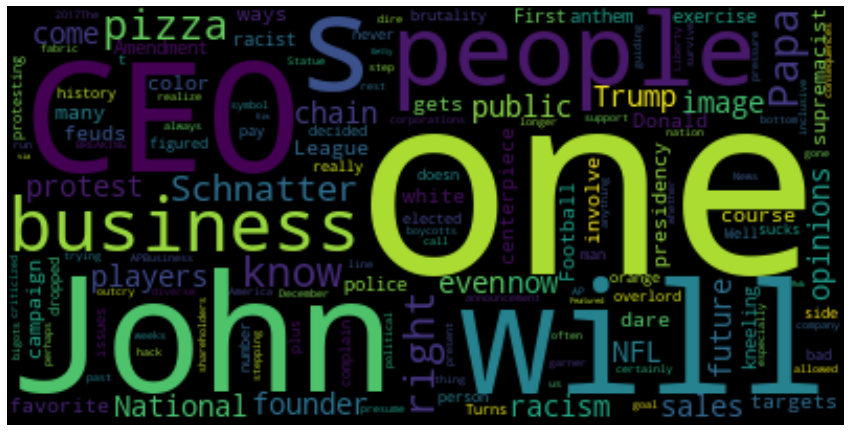

In [244]:
text = fake_news.text[10]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure( figsize=(15,20) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()